<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Ultrafine particles (UFPs)

Air pollution by particulate matter (PM) is one of the main threats to human health, particularly in large cities where pollution levels are continually exceeded. According to their source of emission, geography, and local meteorology, the pollutant particles vary in size and composition. These particles are conditioned to the aerodynamic diameter and thus classified as coarse (2.5–10 μm), fine (0.1–2.5 μm), and ultrafine (<0.1 μm), where the degree of toxicity becomes greater for smaller particles.

EU's new directive classifies Ultrafine particles (UFPs) as the particle number concentrations in cm³ for a size range with a lower limit of ≤ 10 nm and for a size range with no restriction on the upper limit. This means to sum all size ranges of particle number concentrations that satisfy this condition. The particle number concentrations in [dN/dlogDp] are measured with Mobility Particle Size Spectrometers (SMPS or DMPS), where D in [nm] is the geometric mean of the channels. 


In [8]:
import xarray as xr 
import threddsclient

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from datetime import datetime

In [9]:
# Get the ACTRIS NRT thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.xml')

# Get all DMPS opendap urls
dmps_opendap_urls = [x for x in all_opendap_urls if 'dmps' in x]
print('All NRT dmps datasets with opendap protocol: \n',dmps_opendap_urls)

# Get all SMPS opendap urls
smps_opendap_urls = [x for x in all_opendap_urls if 'smps' in x]
print('\nAll NRT smps datasets with opendap protocol: \n',smps_opendap_urls)

All NRT dmps datasets with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/actris_nrt/NO0002R.20230529110000.20230829073405.dmps...3mo.1h.NO01L_NILU_DMPSmodel2_BIR_NRT...nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FI0038U.20230817100000.20230914111201.dmps...4w.1h.FI03L_UHEL_DMPS_KUM_01_NRT.FI03L_TRY_TDMPS.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FI0023R.20230829040000.20230914110602.dmps...16d.1h.FI03L_UHEL_DMPS_VAR_02_NRT.FI03L_TRY_TDMPS.lev1.5.nc']

All NRT smps datasets with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/actris_nrt/DE0043G.20230614110000.20230914111402.smps..pm10.3mo.1h.DE09L_SMPS_MOHP_NRT.DE08L_smps_Adis_OptPar_from_DMPS_0.lev3b.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/DE0043G.20230614110000.20230914111003.smps...3mo.1h.DE09L_SMPS_MOHP_NRT.DE09L_TROPOS_MOHP__lev0-proc-v0-2-0.lev1.5.nc']


In [10]:
# For this example only one opendap_url is used: 
opendap_url = dmps_opendap_urls[1]

In [7]:
# Open and show dataset with xarray 
ds_xr = xr.open_dataset(opendap_url)
ds_xr

<xarray.Dataset>
Dimensions:                                                  (time: 628,
                                                              tbnds: 2,
                                                              metadata_time: 1,
                                                              Location: 1,
                                                              pressure_qc_flags: 1,
                                                              relative_humidity_qc_flags: 1,
                                                              temperature_qc_flags: 1,
                                                              D: 50,
                                                              particle_number_size_distribution_amean_qc_flags: 1,
                                                              particle_number_size_distribution_prec1587_qc_flags: 1,
                                                              particle_number_size_distribution_perc8413_qc_flags: 1)
Coordinates:
  * time                                                     (time) datetime64[ns] ...
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * Location                                                 (Location) |S64 ...
  * D                                                        (D) float64 10.0...
Dimensions without coordinates: tbnds, pressure_qc_flags,
                                relative_humidity_qc_flags,
                                temperature_qc_flags,
                                particle_number_size_distribution_amean_qc_flags,
                                particle_number_size_distribution_prec1587_qc_flags,
                                particle_number_size_distribution_perc8413_qc_flags
Data variables: (12/20)
    time_bnds                                                (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                       (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                              (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                    (Location, metadata_time) |S64 ...
    relative_humidity_qc                                     (Location, relative_humidity_qc_flags, time) float64 ...
    relative_humidity_ebasmetadata                           (Location, metadata_time) |S64 ...
    ...                                                       ...
    pressure                                                 (Location, time) float64 ...
    relative_humidity                                        (Location, time) float64 ...
    temperature                                              (Location, time) float64 ...
    particle_number_size_distribution_amean                  (D, time) float64 ...
    particle_number_size_distribution_prec1587               (D, time) float64 ...
    particle_number_size_distribution_perc8413               (D, time) float64 ...
Attributes: (12/105)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      RI-URBANS_NRT, particle_nu...
    id:                                            FI0038U.20230817100000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

## Plot of particle number size distribution / particle number concentration

In [12]:
df = ds_xr.particle_number_size_distribution_amean.to_dataframe().reset_index()
df

D                time  particle_number_size_distribution_amean
0       10.0 2023-08-17 10:30:00                                   433.51
1       10.0 2023-08-17 11:30:00                                   486.44
2       10.0 2023-08-17 12:30:00                                   302.54
3       10.0 2023-08-17 13:30:00                                   395.74
4       10.0 2023-08-17 14:30:00                                   453.36
...      ...                 ...                                      ...
31395  800.0 2023-09-14 06:30:00                                     2.36
31396  800.0 2023-09-14 07:30:00                                     2.45
31397  800.0 2023-09-14 08:30:00                                     3.51
31398  800.0 2023-09-14 09:30:00                                     2.85
31399  800.0 2023-09-14 10:30:00                                     4.04

[31400 rows x 3 columns]

In [13]:
z = np.log10(df['particle_number_size_distribution_amean'])
zmin = np.min(z)
zmax = np.max(z)
n = 6
tickvals1 = np.linspace(zmin, zmax, n)
ticktext1 = np.round(10 ** np.linspace(zmin, zmax, n), 1)

# Creating a Plotly Graph Object 
fig = go.Figure(go.Heatmap(
        x = df['time'],
        y = df['D'],
        z = np.log10(df['particle_number_size_distribution_amean']),
        #line_smoothing=0.1,
        zsmooth='best',
        colorscale = 'Jet',
        showscale=True,
        colorbar=dict(
            #dtick='L1',
            #ticktext = np.log10(df['particle_number_size_distribution_amean']),
            title='dN/dlogDp ([1/cm3])',
            tickvals = tickvals1, 
            ticktext = ticktext1,
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
            ),
        )
    )

fig.update_layout(
    title='DMPS - particle number size distribution - pm10',
    xaxis_title="Time",
    yaxis_title="D [nm]",
    title_font_size=20, 
)
fig.update_yaxes(type="log")
fig.show()

## Calculate UFPs with xarray
SMPS and DMPS measurements of particle number concentration is given by the normalized concentration, i.e: dN/dlogDp (1/cm³). Where dlogDp is the difference in the log of the channel width.

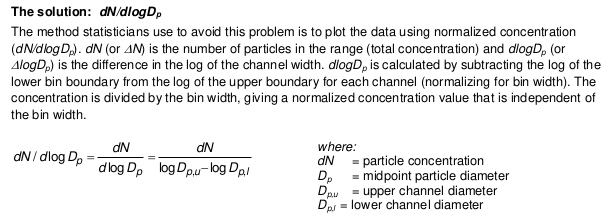

### First a show of the dlogDp calculations

Begining with calculating the boundaries for each channel

In [14]:
#Calculate the boundaries. 
bnds = (ds_xr['D'][1:].values*ds_xr['D'][:-1].values)/np.sqrt(ds_xr['D'][1:].values*ds_xr['D'][:-1].values)
bnds

array([ 10.44030651,  11.43678276,  12.53794241,  13.68685501,
        14.93586288,  16.33278911,  17.88211397,  19.57932583,
        21.42895238,  23.42648074,  25.57635627,  27.92203431,
        30.56795708,  33.46640106,  36.5650106 ,  39.95947948,
        43.70652125,  47.80167361,  52.29722746,  57.19318141,
        62.53734884,  68.38201518,  74.77499582,  81.76857587,
        89.41056984,  97.80107361, 106.99238291, 116.98448615,
       127.92083489, 139.91047137, 152.99673199, 167.28418933,
       182.91629233, 200.04989378, 218.73280504, 239.16076183,
       261.5384293 , 286.01372345, 312.78684435, 342.05799216,
       374.07517961, 409.09089455, 447.35314909, 489.21005713,
       534.96639147, 585.01360668, 639.76104914, 699.60017153,
       765.03594687])

In [15]:
#Diffirentiate between the upper and lower boundaries
upper_bnds = np.append(bnds,0) 
lower_bnds = np.insert(bnds,0,0) 
print('Lower boundaries:\n',lower_bnds)
print('\nGeometric mean D:\n',ds_xr['D'].values)
print('\nUpper boundaries:\n',upper_bnds)

Lower boundaries:
 [  0.          10.44030651  11.43678276  12.53794241  13.68685501
  14.93586288  16.33278911  17.88211397  19.57932583  21.42895238
  23.42648074  25.57635627  27.92203431  30.56795708  33.46640106
  36.5650106   39.95947948  43.70652125  47.80167361  52.29722746
  57.19318141  62.53734884  68.38201518  74.77499582  81.76857587
  89.41056984  97.80107361 106.99238291 116.98448615 127.92083489
 139.91047137 152.99673199 167.28418933 182.91629233 200.04989378
 218.73280504 239.16076183 261.5384293  286.01372345 312.78684435
 342.05799216 374.07517961 409.09089455 447.35314909 489.21005713
 534.96639147 585.01360668 639.76104914 699.60017153 765.03594687]

Geometric mean D:
 [ 10.   10.9  12.   13.1  14.3  15.6  17.1  18.7  20.5  22.4  24.5  26.7
  29.2  32.   35.   38.2  41.8  45.7  50.   54.7  59.8  65.4  71.5  78.2
  85.5  93.5 102.3 111.9 122.3 133.8 146.3 160.  174.9 191.3 209.2 228.7
 250.1 273.5 299.1 327.1 357.7 391.2 427.8 467.8 511.6 559.4 611.8 669.
 731.6 80

Calculating the last boundary for the upper and lower channel

In [16]:
# dlogDp for all
dlogDp = np.zeros(len(ds_xr['D'].values))
dlogDp[1:-1] = np.log10(upper_bnds[1:-1]) - np.log10(lower_bnds[1:-1])

# Calculating the boundary dlogDp's
dlogDp[0] = (np.log10(ds_xr['D'][1]) - np.log10(upper_bnds[0]))*2
dlogDp[-1] = (np.log10(ds_xr['D'][-1]) - np.log10(upper_bnds[-2]))*2

print(dlogDp)

[0.0374265  0.03959062 0.0399224  0.0380774  0.03792665 0.03883004
 0.0393585  0.03937888 0.03920321 0.03870611 0.03813162 0.03810838
 0.03931936 0.0393426  0.03845669 0.03855412 0.03892642 0.03889686
 0.03903556 0.03886559 0.03879521 0.03880243 0.0388145  0.03883004
 0.03880243 0.03895476 0.03900924 0.03877541 0.03881301 0.03890893
 0.03883193 0.03877274 0.03879749 0.03888594 0.0387756  0.03877601
 0.03884558 0.03885136 0.03886161 0.03885126 0.03885915 0.03886092
 0.03883069 0.03884488 0.03883112 0.03883947 0.03885183 0.03883211
 0.03883193 0.03881629]


### Include the dlogDp values in the existing xarray

In [17]:
ds_xr['dlogDp'] = (('D'), dlogDp)
ds_xr

<xarray.Dataset>
Dimensions:                                                  (time: 628,
                                                              tbnds: 2,
                                                              metadata_time: 1,
                                                              Location: 1,
                                                              pressure_qc_flags: 1,
                                                              relative_humidity_qc_flags: 1,
                                                              temperature_qc_flags: 1,
                                                              D: 50,
                                                              particle_number_size_distribution_amean_qc_flags: 1,
                                                              particle_number_size_distribution_prec1587_qc_flags: 1,
                                                              particle_number_size_distribution_perc8413_qc_flags: 1)
Coordinates:
  * time                                                     (time) datetime64[ns] ...
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * Location                                                 (Location) |S64 ...
  * D                                                        (D) float64 10.0...
Dimensions without coordinates: tbnds, pressure_qc_flags,
                                relative_humidity_qc_flags,
                                temperature_qc_flags,
                                particle_number_size_distribution_amean_qc_flags,
                                particle_number_size_distribution_prec1587_qc_flags,
                                particle_number_size_distribution_perc8413_qc_flags
Data variables: (12/21)
    time_bnds                                                (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                       (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                              (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                    (Location, metadata_time) |S64 ...
    relative_humidity_qc                                     (Location, relative_humidity_qc_flags, time) float64 ...
    relative_humidity_ebasmetadata                           (Location, metadata_time) |S64 ...
    ...                                                       ...
    relative_humidity                                        (Location, time) float64 ...
    temperature                                              (Location, time) float64 ...
    particle_number_size_distribution_amean                  (D, time) float64 ...
    particle_number_size_distribution_prec1587               (D, time) float64 ...
    particle_number_size_distribution_perc8413               (D, time) float64 ...
    dlogDp                                                   (D) float64 0.03...
Attributes: (12/105)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      RI-URBANS_NRT, particle_nu...
    id:                                            FI0038U.20230817100000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

### Calculate total concentration

In [18]:
# Multiplying the particle_number_size_distribution_amean with dlogDp

total_concentration = (ds_xr.particle_number_size_distribution_amean * ds_xr.dlogDp).rename('total_concentration')
total_concentration

<xarray.DataArray 'total_concentration' (D: 50, time: 628)>
array([[1.62247611e+01, 1.82057457e+01, 1.13230127e+01, ...,
        6.32938220e+01, 6.60132313e+01, 6.63699059e+01],
       [2.88857145e+01, 3.94279056e+01, 2.45849851e+01, ...,
        1.39356618e+02, 1.46614371e+02, 1.52188730e+02],
       [3.77909420e+01, 4.92191279e+01, 3.38849345e+01, ...,
        1.81039695e+02, 1.87910340e+02, 2.03895668e+02],
       ...,
       [1.68143045e-01, 1.87170780e-01, 1.28922612e-01, ...,
        1.20767869e-01, 1.86782459e-01, 1.74356183e-01],
       [9.55265591e-02, 1.65812361e-01, 1.44454797e-01, ...,
        9.78564752e-02, 1.58434293e-01, 1.79015219e-01],
       [9.04419561e-02, 8.30668610e-02, 8.77248158e-02, ...,
        1.36245179e-01, 1.10626427e-01, 1.56817812e-01]])
Coordinates:
  * time     (time) datetime64[ns] 2023-08-17T10:30:00 ... 2023-09-14T10:30:00
  * D        (D) float64 10.0 10.9 12.0 13.1 14.3 ... 611.8 669.0 731.6 800.0

### Calculate UFPs

In [19]:
# For all these instruments the first channel is D = 10.0 nm, 
# then the UFPs are calculated by the sum of the total concentration for all channels.
if ds_xr.D.values[0] == 10.0: 
    ufp = total_concentration.sum(dim='D').rename('ultrafine_particles')
ufp


<xarray.DataArray 'ultrafine_particles' (time: 628)>
array([ 2171.79259299,  2516.21268056,  2976.49074383,  2934.35683461,
        3189.6430208 ,  3446.93211439,  3741.4264264 ,  5067.83285703,
        5316.77552772,  5301.60118535,  5665.84965565,  6261.21928085,
        6034.44517928,  4182.09622096,  3586.50792   ,  3659.74500704,
        4321.59001261,  5162.51580448,  4396.77294324,  3494.1733691 ,
        3700.87745385,  9529.89447043,  7833.23086459,  4107.66946102,
        5187.81962387,  4943.16232212,  3638.45079562,  4082.75734193,
        3484.27890515,  3716.55333135,  3319.09176483,  2555.30793676,
        1832.52796963,  2087.02507544,  2713.07028541,  2282.19994194,
        2591.9157676 ,  3481.99186249,  3838.26757958,  3430.02380161,
        3760.15106084,  3481.31834012,  4291.28827003,  4817.78093331,
        4811.87492254,  2861.38548709,  2253.81229424,  2482.808566  ,
        2315.49340368,  3095.10039638,  3795.03731629,  4502.94314344,
        4205.74571507,  3890.98921597,  5046.98403794,  3700.00455004,
        2707.96575033,  2779.10548414,  2737.58779466,  2596.98302295,
        2306.56348177,  2501.01381971,  4075.72327874,  5370.3382014 ,
        4667.14432144,  2385.53442689,  2175.47189942,  1925.03420041,
        1498.11692142,  1682.41048507,  2872.14750904,  2502.3302526 ,
        2786.57036051,  3378.92117247,  3301.44803248,  3789.03859079,
        4946.57073586,  6480.74729127,  6961.05875357,  5527.22152655,
...
        3182.1464358 ,  2775.94261413,  2874.16532489,  2962.99316476,
        2743.01514025,  2631.41032747,  2536.62831043,  2601.38219223,
        2715.4711097 ,  2931.28465787,  4233.33671922,  3512.30477114,
        3626.19795873,  3775.30244852,  3097.37841013,  3196.11926391,
        3264.92942191,  4096.24986596,  3948.39134151,  3867.21481219,
        3421.89718772,  3553.63296688,  4852.97522716,  5515.06281425,
        5542.49919636,  4824.76366976,  8779.54415144,  7659.50472718,
        9620.45041152,  3095.47594829,  2465.36093853,  2918.69450492,
        5305.10549924,  5923.09873487,  6269.66355178,  4891.53639734,
        4503.36459248,  4247.15424566,  4245.21310535,  3526.57207174,
        3862.70632026,  2560.65681746,  1761.81145915,  1918.16790549,
        2195.71054927,  3269.9219772 ,  4707.89250175,  3922.0985655 ,
        3229.76944679,  4355.53231206,  2982.22616481,  2202.54103599,
        2149.92700412,  2454.99336829,  2746.39319447,  2946.89817668,
        3097.58830539,  3274.26406472,  6047.46727928,  6794.47599113,
        4777.66469393,  4758.13853114,  5448.62311521,  4435.10924495,
        3003.07406597,  4819.67927386,  9060.70503418,  5856.89071958,
        6744.84000778,  8285.49892291,  6602.99083805,  2667.22040815,
        3539.30856042,  2650.86845412,  3405.36275213,  4228.34789648,
        4559.19854499,  4937.75092678,  4757.91799897,  4458.2307444 ])
Coordinates:
  * time     (time) datetime64[ns] 2023-08-17T10:30:00 ... 2023-09-14T10:30:00

### Plot the UFP timeseries

In [21]:
df_ufp = ufp.to_dataframe().reset_index().set_index('time')

In [23]:
fig = px.line(df_ufp)
fig.update_layout(
    title='Ultrafine particles',
    xaxis_title="Time",
    yaxis_title="UFPs [1/cm3]",
    showlegend=False,
    title_font_size=20
)

fig.show()

### Calculate mean values 


In [24]:
ufp_d = ufp.resample(time="1D").mean()
ufp_m = ufp.resample(time="1M").mean()

In [25]:
print('Daily mean: ', ufp_d.values[0], ' at ', np.datetime64(ufp_d.time.values[0], 'D'))
print('Monthly mean: ', ufp_m.values[0], ' at ', np.datetime64(ufp_m.time.values[0], 'M'))

Daily mean:  4201.890623034234  at  2023-08-17
Monthly mean:  3576.025665699026  at  2023-08
